In [40]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.6/32.6 MB 9.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selectivesearch

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=dc572569584fd4f96737fe6d9aba4ec39dfcf50ec2e2d798acb27b5bda4db36d
  Stored in directory: /Users/lieselvranckx/Library/Caches/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import selectivesearch

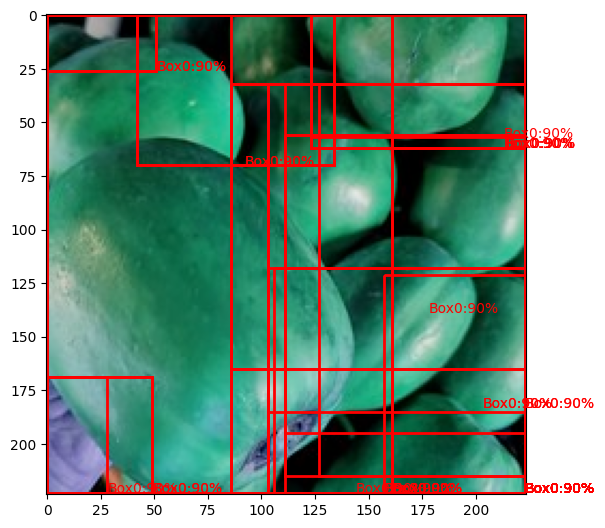

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Papaya/1225.jpg'
data_directory = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train'

# Load the image
image = cv2.imread(image_path)

# draw emtpy figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0, 0, 1, 1])

# plot image
plt.imshow(image)

# Perform selective search to generate candidate regions
selective_search = selectivesearch.selective_search(image, scale=500, sigma=0.9, min_size=10)
min_box_size = 1000

boxes = []
for region in selective_search[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        boxes.append((x, y, x + w, y + h))  # Convert coordinates to integers
rect = []
for i,(x,y,w,h) in enumerate(boxes):
    rect.append(patches.Rectangle((x,y),w,h, edgecolor='red', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])
    ax.text(w, h, 'Box0:90%', color='red')  


# show figure
plt.show()

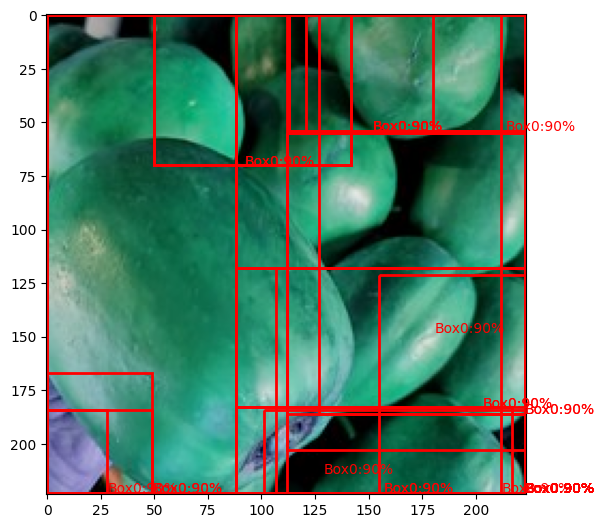

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Papaya/1225.jpg'
data_directory = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train'

# Load the image
image = cv2.imread(image_path)

# draw emtpy figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0, 0, 1, 1])

# plot image
plt.imshow(image)

# Perform selective search to generate candidate regions
selective_search = selectivesearch.selective_search(image, scale=750, sigma=0.99, min_size=7)
min_box_size = 1000

boxes = []
for region in selective_search[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        boxes.append((x, y, x + w, y + h))  # Convert coordinates to integers
        
rect = []
for i,(x,y,w,h) in enumerate(boxes):
    rect.append(patches.Rectangle((x,y),w,h, edgecolor='red', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])
    ax.text(w, h, 'Box0:90%', color='red')  


# show figure
plt.show()

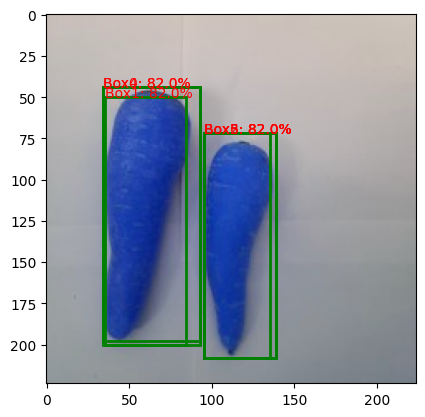

In [75]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Carrot/1023.jpg'

# Load the image
image = cv2.imread(image_path)

# Draw an empty figure
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image)


# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.99, min_size=10)
min_box_size = 1000

# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.18
aspect_ratio_range = 0.25

selected_boxes = []
for region in selective_search_results[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_boxes.append((x, y, x + w, y + h))

rect = []
for i, (x, y, x2, y2) in enumerate(selected_boxes):
    rect.append(patches.Rectangle((x, y), x2 - x, y2 - y, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='red')

# Show the figure
plt.show()


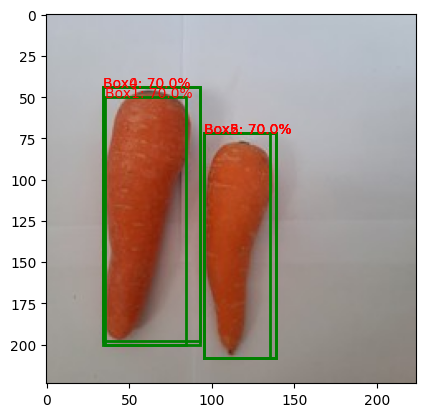

In [84]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Carrot/1023.jpg'

# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.99, min_size=10)
min_box_size = 1000

# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.35

selected_boxes = []
for region in selective_search_results[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_boxes.append((x, y, x + w, y + h))

rect = []
for i, (x, y, x2, y2) in enumerate(selected_boxes):
    rect.append(patches.Rectangle((x, y), x2 - x, y2 - y, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='red')

# Show the figure
plt.show()


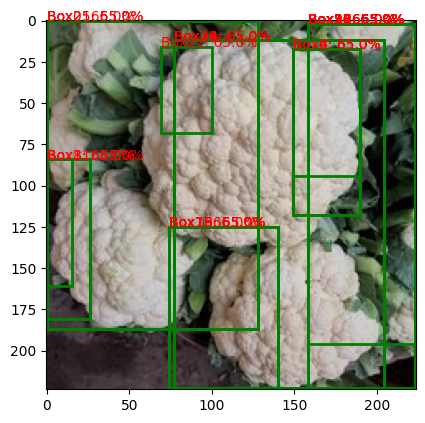

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/Cauliflower/0341.jpg'

# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.95, min_size=10)
min_box_size = 1000

# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.35
aspect_ratio_range = 0.35

selected_boxes = []
for region in selective_search_results[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_boxes.append((x, y, x + w, y + h))

rect = []
for i, (x, y, x2, y2) in enumerate(selected_boxes):
    rect.append(patches.Rectangle((x, y), x2 - x, y2 - y, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='red')

# Show the figure
plt.show()

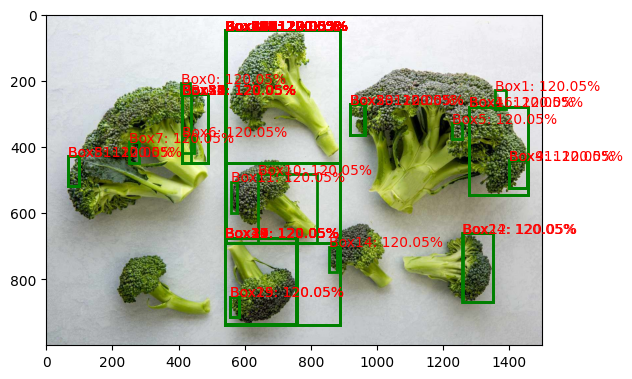

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch


image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.99, min_size=10)
min_box_size = 1000

# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.35

selected_boxes = []
for region in selective_search_results[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_boxes.append((x, y, x + w, y + h))

rect = []
for i, (x, y, x2, y2) in enumerate(selected_boxes):
    rect.append(patches.Rectangle((x, y), x2 - x, y2 - y, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='red')

# Show the figure
plt.show()


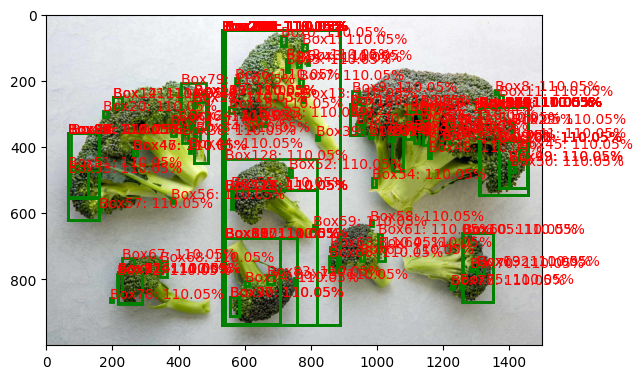

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch


image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.95, min_size=14)
min_box_size = 100

# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.40
aspect_ratio_range = 0.45

selected_boxes = []
for region in selective_search_results[1]:
    x, y, w, h = region['rect']
    if w * h >= min_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_boxes.append((x, y, x + w, y + h))

rect = []
for i, (x, y, x2, y2) in enumerate(selected_boxes):
    rect.append(patches.Rectangle((x, y), x2 - x, y2 - y, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='red')

# Show the figure
plt.show()

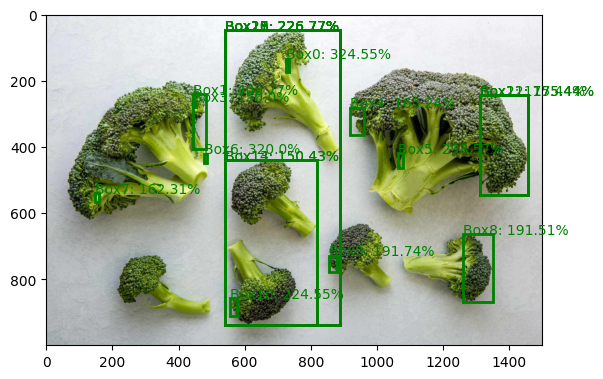

In [15]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch


image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()
# Plot the image
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=850, sigma=0.95, min_size=100)

objectness_score_threshold = 0.9
minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates_rect = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']
    if w * h >= minimum_bounding_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_candidates_rect.append(candidate['rect'])


rect = []
for i, (x, y, w, h) in enumerate(selected_candidates_rect):
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


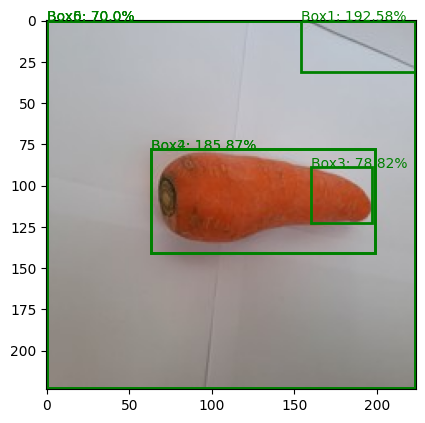

In [169]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Carrot/1022.jpg'
# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()
# Plot the imag
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

objectness_score_threshold = 0.9
minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check objectness score, bounding box size, and aspect ratio
    if bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append(candidate)

rect = []
for i, candidate in enumerate(selected_candidates):
    x, y, w, h = candidate['rect']
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


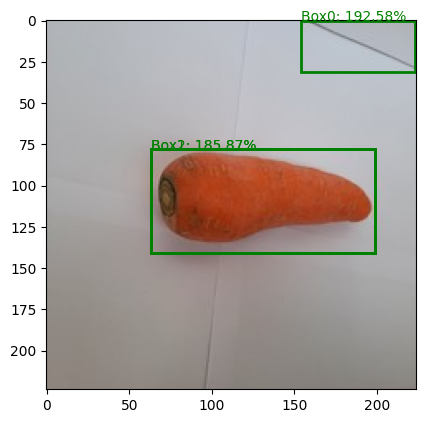

In [170]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Carrot/1022.jpg'
# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()
# Plot the image
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

objectness_score_threshold = 0.9
minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check objectness score, bounding box size, and aspect ratio
    if (
        bounding_box_size >= minimum_bounding_box_size
        and aspect_ratio <= maximum_aspect_ratio
        and (aspect_ratio - target_aspect_ratio) * 100 > 100
    ):
        selected_candidates.append(candidate)

rect = []
for i, candidate in enumerate(selected_candidates):
    x, y, w, h = candidate['rect']
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


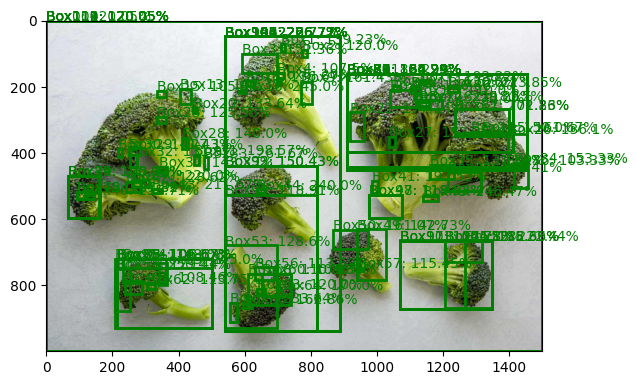

In [45]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'
# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Draw an empty figure
fig, ax = plt.subplots()
# Plot the image
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

objectness_score_threshold = 0.9
minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check objectness score, bounding box size, and aspect ratio
    if (
        bounding_box_size >= minimum_bounding_box_size
        and aspect_ratio <= maximum_aspect_ratio
        and (aspect_ratio - target_aspect_ratio) * 100 > 100
    ):
        selected_candidates.append(candidate)

rect = []
for i, candidate in enumerate(selected_candidates):
    x, y, w, h = candidate['rect']
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()

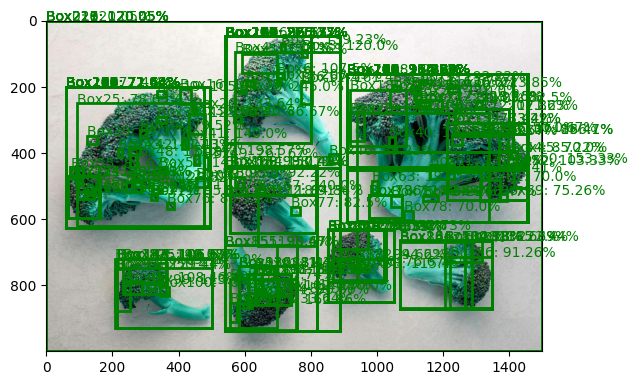

In [54]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'


# Draw an empty figure
fig, ax = plt.subplots()
# Plot the imag
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

objectness_score_threshold = 0.9
minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check objectness score, bounding box size, and aspect ratio
    if bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append(candidate)

rect = []
for i, candidate in enumerate(selected_candidates):
    x, y, w, h = candidate['rect']
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()

/Users/lieselvranckx/.pyenv/versions/3.10.6/envs/veggideas/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


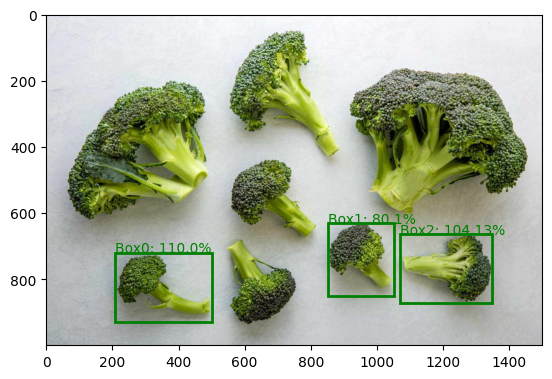

In [70]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'

# Load the image
image = cv2.imread(image_path)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Exclude the bounding box of the whole picture
    image_size = image.shape[0] * image.shape[1]
    box_coverage = bounding_box_size / image_size
    if box_coverage < 0.98 and bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append({'rect': (x, y, w, h), 'index': i})

# List to store the filtered bounding boxes
filtered_boxes = []

# Iterate through the selected bounding boxes
for i in range(len(selected_candidates)):
    current_box = selected_candidates[i]['rect']
    is_contained = False

    # Check if the current box is contained within any other box
    for j in range(len(selected_candidates)):
        if i != j:
            other_box = selected_candidates[j]['rect']
            if (other_box[0] <= current_box[0] and other_box[1] <= current_box[1] and
                    other_box[0] + other_box[2] >= current_box[0] + current_box[2] and
                    other_box[1] + other_box[3] >= current_box[1] + current_box[3]):
                # The current box is fully contained within another box
                is_contained = True
                break

    # If the current box is not contained, add it to the filtered list
    if not is_contained:
        filtered_boxes.append(current_box)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

rect = []
for i, box in enumerate(filtered_boxes):
    x, y, w, h = box
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()

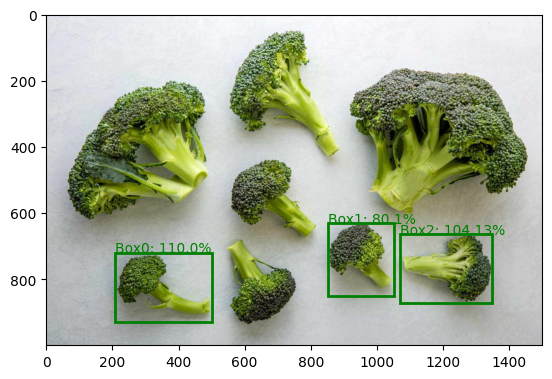

In [72]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'

# Load the image
image = cv2.imread(image_path)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Exclude the bounding box of the whole picture
    image_size = image.shape[0] * image.shape[1]
    box_coverage = bounding_box_size / image_size
    if box_coverage < 0.98 and bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append({'rect': (x, y, w, h), 'index': i})

# List to store the filtered bounding boxes
filtered_boxes = []

# Iterate through the selected bounding boxes
for i in range(len(selected_candidates)):
    current_box = selected_candidates[i]['rect']
    is_contained = False

    # Check if any part of the current box is contained within another box
    for j in range(len(selected_candidates)):
        if i != j:
            other_box = selected_candidates[j]['rect']
            if (current_box[0] >= other_box[0] and current_box[1] >= other_box[1] and
                    current_box[0] + current_box[2] <= other_box[0] + other_box[2] and
                    current_box[1] + current_box[3] <= other_box[1] + other_box[3]):
                # The current box is partially contained within another box
                is_contained = True
                break

    # If the current box is not contained, add it to the filtered list
    if not is_contained:
        filtered_boxes.append(current_box)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

rect = []
for i, box in enumerate(filtered_boxes):
    x, y, w, h = box
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


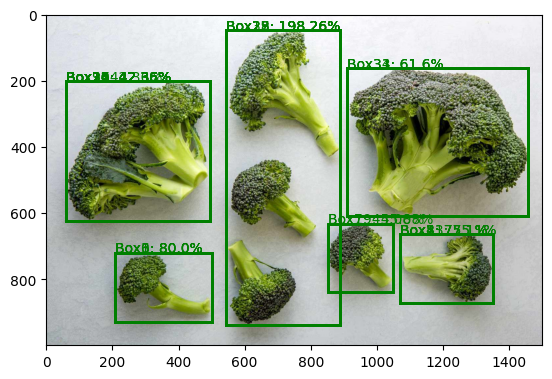

In [132]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'

# Load the image
image = cv2.imread(image_path)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.8, min_size=100)

minimum_bounding_box_size = 80
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.6
aspect_ratio_range = 0.6

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Exclude the bounding box of the whole picture
    image_size = image.shape[0] * image.shape[1]
    box_coverage = bounding_box_size / image_size
    if box_coverage < 0.98 and bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append({'rect': (x, y, w, h), 'index': i})


# Function to calculate the coverage ratio between two bounding boxes
def calculate_coverage_ratio(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(x1, x2)
    intersection_y = max(y1, y2)
    intersection_w = min(x1 + w1, x2 + w2) - intersection_x
    intersection_h = min(y1 + h1, y2 + h2) - intersection_y

    intersection_area = max(0, intersection_w) * max(0, intersection_h)
    box1_area = w1 * h1
    box2_area = w2 * h2

    return intersection_area / box1_area, box1_area, box2_area

# List to store the filtered bounding boxes
filtered_boxes = []

# Iterate through the selected bounding boxes
for i in range(len(selected_candidates)):
    current_box = selected_candidates[i]['rect']
    is_contained = False
    smol = False

    # Check if the coverage ratio of the current box is less than 90% of any other box
    for j in range(len(selected_candidates)):
        if i != j:
            other_box = selected_candidates[j]['rect']
            coverage_ratio, current_area, other_area = calculate_coverage_ratio(current_box, other_box)
            if coverage_ratio >= 0.5 and current_area < other_area:
                # The current box is contained within another box
                smol = True
                break
    # If the current box is not contained, add it to the filtered list
    if not smol:
        filtered_boxes.append(current_box)


# Create a figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

rect = []
for i, box in enumerate(filtered_boxes):
    x, y, w, h = box
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()

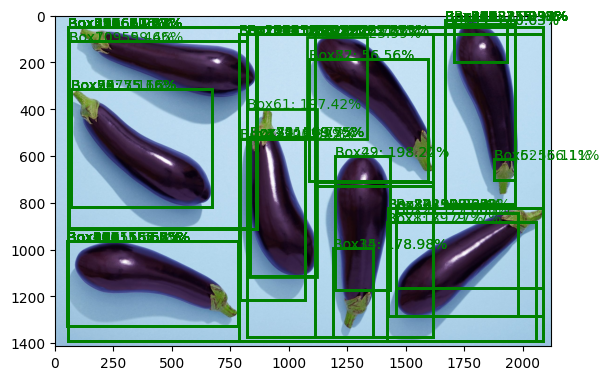

In [108]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/eggplants.jpeg'

# Load the image
image = cv2.imread(image_path)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.95, min_size=100)

minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.45
aspect_ratio_range = 0.30

selected_candidates = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Exclude the bounding box of the whole picture
    image_size = image.shape[0] * image.shape[1]
    box_coverage = bounding_box_size / image_size
    if box_coverage < 0.98 and bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append({'rect': (x, y, w, h), 'index': i})


# Function to calculate the coverage ratio between two bounding boxes
def calculate_coverage_ratio(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(x1, x2)
    intersection_y = max(y1, y2)
    intersection_w = min(x1 + w1, x2 + w2) - intersection_x
    intersection_h = min(y1 + h1, y2 + h2) - intersection_y

    intersection_area = max(0, intersection_w) * max(0, intersection_h)
    box1_area = w1 * h1
    box2_area = w2 * h2

    return intersection_area / box1_area, box1_area, box2_area

# List to store the filtered bounding boxes
filtered_boxes = []

# Iterate through the selected bounding boxes
for i in range(len(selected_candidates)):
    current_box = selected_candidates[i]['rect']
    is_contained = False

    # Check if the coverage ratio of the current box is less than 90% of any other box
    for j in range(len(selected_candidates)):
        if i != j:
            other_box = selected_candidates[j]['rect']
            coverage_ratio, current_area, other_area = calculate_coverage_ratio(current_box, other_box)
            if coverage_ratio >= 0.99:
                # The current box is contained within another box
                is_contained = True
                if current_area >= other_area:
                    filtered_boxes.append(current_box)
                else:
                    break
    # If the current box is not contained, add it to the filtered list
    if not is_contained:
        filtered_boxes.append(current_box)


# Create a figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

rect = []
for i, box in enumerate(filtered_boxes):
    x, y, w, h = box
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


In [69]:
selected_candidates

[{'rect': (0, 0, 1499, 999), 'size': 984543, 'labels': [0.0]},
 {'rect': (544, 47, 256, 323), 'size': 26480, 'labels': [1.0]},
 {'rect': (709, 71, 13, 22), 'size': 120, 'labels': [2.0]},
 {'rect': (772, 87, 16, 24), 'size': 111, 'labels': [3.0]},
 {'rect': (571, 93, 318, 353), 'size': 35244, 'labels': [4.0]},
 {'rect': (592, 100, 107, 59), 'size': 2222, 'labels': [5.0]},
 {'rect': (697, 158, 22, 16), 'size': 136, 'labels': [8.0]},
 {'rect': (911, 161, 501, 236), 'size': 40955, 'labels': [9.0]},
 {'rect': (698, 174, 9, 21), 'size': 128, 'labels': [11.0]},
 {'rect': (1131, 180, 20, 9), 'size': 108, 'labels': [12.0]},
 {'rect': (604, 182, 25, 15), 'size': 167, 'labels': [13.0]},
 {'rect': (769, 184, 35, 67), 'size': 571, 'labels': [14.0]},
 {'rect': (1048, 198, 22, 15), 'size': 184, 'labels': [15.0]},
 {'rect': (61, 199, 417, 427), 'size': 34439, 'labels': [16.0]},
 {'rect': (1104, 200, 27, 18), 'size': 322, 'labels': [17.0]},
 {'rect': (1214, 201, 33, 13), 'size': 207, 'labels': [18.0]},

In [66]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'

# Load the image
image = cv2.imread(image_path)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for i, rect in enumerate(selective_search_results[1]):
    x, y, w, h = rect

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check bounding box size and aspect ratio
    if bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append({'rect': (x, y, w, h), 'index': i})

# List to store the filtered bounding boxes
filtered_boxes = []

# Iterate through the selected bounding boxes
for i in range(len(selected_candidates)):
    current_box = selected_candidates[i]['rect']
    is_contained = False

    # Check if the current box is contained within any other box
    for j in range(len(selected_candidates)):
        if i != j:
            other_box = selected_candidates[j]['rect']
            if (other_box[0] <= current_box[0] and other_box[1] <= current_box[1] and
                    other_box[0] + other_box[2] >= current_box[0] + current_box[2] and
                    other_box[1] + other_box[3] >= current_box[1] + current_box[3]):
                # The current box is fully contained within another box
                is_contained = True
                break

    # If the current box is not contained, add it to the filtered list
    if not is_contained:
        filtered_boxes.append(current_box)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

rect = []
for i, box in enumerate(filtered_boxes):
    x, y, w, h = box
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


ValueError: not enough values to unpack (expected 4, got 3)

In [67]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch

image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/train/brocolis.jpeg'

# Load the image
image = cv2.imread(image_path)

# Perform selective search to generate candidate regions
selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.9, min_size=100)

minimum_bounding_box_size = 100
maximum_aspect_ratio = 3
# Calculate target aspect ratio range (adjust as per your requirement)
target_aspect_ratio = 0.30
aspect_ratio_range = 0.30

selected_candidates = []
for i, (x, y, w, h) in enumerate(selective_search_results[1]):
    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check bounding box size and aspect ratio
    if bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append({'rect': (x, y, w, h), 'index': i})

# List to store the filtered bounding boxes
filtered_boxes = []

# Iterate through the selected bounding boxes
for i in range(len(selected_candidates)):
    current_box = selected_candidates[i]['rect']
    is_contained = False

    # Check if the current box is contained within any other box
    for j in range(len(selected_candidates)):
        if i != j:
            other_box = selected_candidates[j]['rect']
            if (other_box[0] <= current_box[0] and other_box[1] <= current_box[1] and
                    other_box[0] + other_box[2] >= current_box[0] + current_box[2] and
                    other_box[1] + other_box[3] >= current_box[1] + current_box[3]):
                # The current box is fully contained within another box
                is_contained = True
                break

    # If the current box is not contained, add it to the filtered list
    if not is_contained:
        filtered_boxes.append(current_box)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

rect = []
for i, box in enumerate(filtered_boxes):
    x, y, w, h = box
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


ValueError: not enough values to unpack (expected 4, got 3)

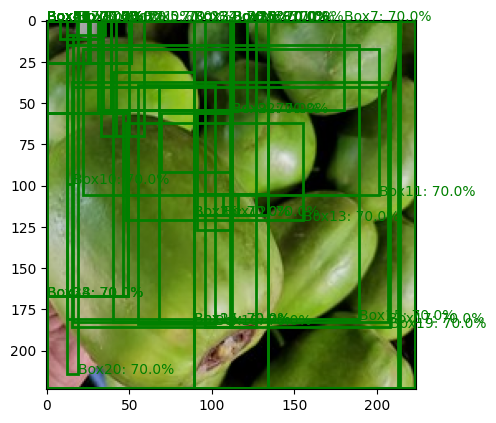

In [185]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch


image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Papaya/1225.jpg'
# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
# Perform selective search to generate candidate regions


# Draw an empty figure
fig, ax = plt.subplots()
# Plot the image
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.95, min_size=15)


objectness_score_threshold = 0.6
minimum_bounding_box_size = 80
maximum_aspect_ratio = 3
target_aspect_ratio = 0.30
aspect_ratio_range = 0.40

selected_candidates_rect = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']
    if w * h >= minimum_bounding_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_boxes.append((x, y, x + w, y + h))
    rect = candidate['rect']
    selected_candidates_rect.append(rect)

selected_candidates = []
for candidate in selected_candidates_rect:
    x, y, w, h = candidate

    # Check if width or height is zero
    if w == 0 or h == 0:
        continue

    # Calculate bounding box size and aspect ratio
    bounding_box_size = w * h
    aspect_ratio = max(w / h, h / w)

    # Check objectness score, bounding box size, and aspect ratio
    if bounding_box_size >= minimum_bounding_box_size and aspect_ratio <= maximum_aspect_ratio:
        selected_candidates.append(candidate)


rect = []
for i, (x, y, x2, y2) in enumerate(selected_candidates):
    rect.append(patches.Rectangle((x, y), x2 - x, y2 - y, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio_diff = abs((aspect_ratio - target_aspect_ratio) * 100)
    ax.text(x, y, f'Box{i}: {round(aspect_ratio_diff, 2)}%', color='green')

# Show the figure
plt.show()


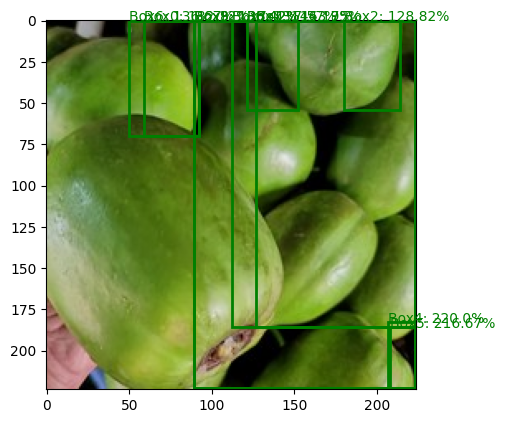

In [188]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch


image_path = '/Users/lieselvranckx/code/ArthurDercq/veggideas/raw_data/test/Papaya/1225.jpg'
# Load the image with correct color channels
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
# Perform selective search to generate candidate regions

# Draw an empty figure
fig, ax = plt.subplots()
# Plot the image
ax.imshow(image)

selective_search_results = selectivesearch.selective_search(image, scale=750, sigma=0.95, min_size=15)

objectness_score_threshold = 0.6
minimum_bounding_box_size = 80
maximum_aspect_ratio = 3
target_aspect_ratio = 0.30
aspect_ratio_range = 0.40

selected_candidates_rect = []
for candidate in selective_search_results[1]:
    x, y, w, h = candidate['rect']
    if w * h >= minimum_bounding_box_size:
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - target_aspect_ratio) <= aspect_ratio_range:
            selected_candidates_rect.append(candidate['rect'])

# Select only a subset of boxes (e.g., top 5)
num_selected_boxes = 10
selected_candidates_rect = selected_candidates_rect[:num_selected_boxes]

rect = []
for i, (x, y, w, h) in enumerate(selected_candidates_rect):
    rect.append(patches.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2))
    ax.add_patch(rect[i])

    aspect_ratio = max(w / h, h / w)
    ax.text(x, y, f'Box{i}: {round((aspect_ratio - target_aspect_ratio) * 100, 2)}%', color='green')

# Show the figure
plt.show()


In [129]:
selective_search_results[1]

[{'rect': (0, 0, 223, 223), 'size': 21254, 'labels': [0.0]},
 {'rect': (12, 0, 23, 5), 'size': 92, 'labels': [1.0]},
 {'rect': (48, 0, 6, 4), 'size': 25, 'labels': [2.0]},
 {'rect': (56, 0, 23, 22), 'size': 73, 'labels': [3.0]},
 {'rect': (42, 0, 181, 184), 'size': 23842, 'labels': [4.0]},
 {'rect': (156, 0, 12, 53), 'size': 107, 'labels': [5.0]},
 {'rect': (157, 0, 3, 41), 'size': 128, 'labels': [6.0]},
 {'rect': (161, 0, 9, 39), 'size': 88, 'labels': [7.0]},
 {'rect': (162, 0, 7, 37), 'size': 298, 'labels': [8.0]},
 {'rect': (209, 0, 14, 8), 'size': 80, 'labels': [9.0]},
 {'rect': (209, 6, 14, 12), 'size': 96, 'labels': [10.0]},
 {'rect': (201, 16, 22, 10), 'size': 41, 'labels': [11.0]},
 {'rect': (85, 34, 20, 17), 'size': 142, 'labels': [12.0]},
 {'rect': (221, 39, 2, 9), 'size': 23, 'labels': [13.0]},
 {'rect': (41, 40, 50, 103), 'size': 760, 'labels': [14.0]},
 {'rect': (188, 44, 23, 13), 'size': 55, 'labels': [15.0]},
 {'rect': (160, 50, 8, 10), 'size': 17, 'labels': [16.0]},
 {'

In [130]:
selective_search[1][3]['rect']

(156, 0, 12, 57)

In [18]:
selective_search[1][4]['rect']

(35, 0, 12, 9)

In [16]:
print(boxes[0][0])

0
